# MLP from Scratch with Exploding and Vanishing Gradients


**SGD and CE loss are covered**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns


**For vanishing we don't need to change the network architecture(solved later)**

In [ ]:
class Neural_Network():
    def __init__(self, neurons, Activations):
        # arguments: an array "neurons" consist of number of neurons for each layer, 
        # an array "activations" consisting of activation functions used for the hidden layers and output layer
        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] #weights for each layer
        self.biases = [] #biases in each layer 
        self.layer_activations = [] #activations in each layer
        self.exploding = exploding  #this is when are asked to design a network that explodes(gradient)
        #this change can be seen in the loop below
        for i in range(len(neurons)-1):      #the case when we don't want gradients to explode we go with this layer
            self.weights.append(np.random.rand(neurons[i+1],neurons[i])) #weight matrix between layer i and layer i+1
            self.biases.append(np.random.rand(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) #activations for each layer
            
    def sigmoid(self, z): # sigmoid activation function                  
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoidPrime(self,z): # derivative of sigmoid activation function
        return self.sigmoid(z)*(1-self.sigmoid(z))

                          
    def tanh(self, z): # hyperbolic tan activation function
        '''
           tanh activation fuction  
        '''
        #Fill in the details to compute and return the tanh activation function                  
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))          
    
    def tanhPrime(self,x): # derivative of hyperbolic tan activation function
        '''
            derivative of tanh function 
        '''
        return (1.0-(self.tanh(x))**2)                               
                          
    def linear(self, z): 
        '''
            linear activation function
        '''
        # Linear activation function                                    
        return z                                                      
    
    def linearPrime(self,x): # derivative of linear activation function
        '''
            derivative of linear function 
        '''                                                   
        return np.ones(x.shape)                                      

    def ReLU(self,z): # ReLU activation function
        '''
            ReLU activation function 
        '''                
        return np.maximum(0,z)                                        
    
    def ReLUPrime(self,z): # derivative of ReLU activation function
        '''
            derivative of ReLU function 
        '''
        return (z>0).astype(z.dtype)                                  
    
    def forward(self, a): # function of forward pass which will receive input and give the output of final layer
        '''
            This is the forward pass step for the Neural Network
            There are two steps : 
            1. computing z from activations of last layer 
            2. applying activation function on z to compute a
        '''
        layer_activations_a = [a] #store the input as the input layer activations
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]
            if self.layer_activations[i].lower()=='sigmoid':
                z = np.dot(w, a)+b
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower()=='relu':
                z = np.dot(w, a)+b
                a = self.ReLU(z)
            elif self.layer_activations[i].lower()=='tanh':   
                z = np.dot(w, a)+b
                a =self.tanh(z)
            elif self.layer_activations[i].lower()=='linear':
                z = np.dot(w, a)+b
                a = self.linear(z)
            layer_dot_prod_z.append(z)    
            layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a
                          
            
    
    def backward(self, x, y, zs, activations): # find the loss and return derivative of loss w.r.t every parameter
        '''
            This is the step where we update our weights to optimize loss
        '''
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        
        # backward pass
        
        ##
        #this is for the last layer
       ####################
        if self.layer_activations[-1].lower()=='sigmoid':
            delta = (activations[-1] - y)*self.sigmoidPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='relu':
            delta = (activations[-1] - y)*ReLUPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='tanh':   
            delta = (activations[-1] - y)*tanhPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='linear':
            delta = (activations[-1] - y)*linearPrime(zs[-1])
       ####################
        # fill in the appropriate details for gradients of w and b
        grad_b[-1] = np.sum(delta,axis=1,keepdims=True)/(delta.shape[1]) 
        grad_w[-1] = np.dot(delta,activations[-2].T)/(delta.shape[1])
       ####################
        for l in range(2, self.layers): # Here l is in backward sense i.e. last l th layer
            z = zs[-l]
            if self.layer_activations[-l].lower()=='sigmoid':
                prime = self.sigmoidPrime(z)
            elif self.layer_activations[-l].lower()=='relu':
                prime = self.ReLUPrime(z)
            elif self.layer_activations[-l].lower()=='tanh':   
                prime = self.tanhPrime(z)
            elif self.layer_activations[-l].lower()=='linear':
                prime = self.linearPrime(z)

            #Compute delta, gradients of b and w 
            delta = np.dot((self.weights[-l+1]).T,delta)*prime
            grad_w[-l] = np.dot(delta,activations[-l-1].T)/(delta.shape[1])
            grad_b[-l] = np.sum(delta,axis=1,keepdims=True)/(delta.shape[1]) 
                          
        return (grad_b, grad_w)                 

    def update_parameters(self, grads, learning_rate): # update the parameters using the gradients
        # update weights and biases using the gradients and the learning rate
        grad_b, grad_w = grads[0], grads[1]       
        
        self.weights = np.array(self.weights)
        self.biases = np.array(self.biases)
        grad_w = np.array(grad_w)
        grad_b = np.array(grad_b)

        #Implement the update rule for weights  and biases
        self.weights = self.weights - learning_rate*grad_w
        self.biases = self.biases - learning_rate*grad_b
        
    def loss(self, predicted, actual):
        #Implement the loss function
        '''
           This is the squared error loss funciton 
        '''
        return 0.5*(predicted-actual)**2
                     
    def train(self, X, Y, minibatch=False,minibatchsize=20,lr=1e-3,epochs=1000): # receive the full training data set 
        loss_list = []
        if minibatch==False:
            for e in range(epochs): 
                losses = []
                for q in range(len(X)):
                    train_x = np.resize(X[q],(X[q].shape[0],1))
                    if not onehotencoded: 
                        train_y = np.resize(Y[q],(1,1))
                    else:
                        train_y = np.resize(np.argmax(Y[q]),(1,1)) 
                    out, dot_prod_z, activations_a = self.forward(train_x)
                    loss = self.loss(out, train_y)
                    grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass
                    self.update_parameters(grads, lr)
                    losses.append(loss)
                loss_list.append(np.mean(np.array(losses)))
                print(f'Epoch: {e} Loss: {np.mean(np.array(losses))}')
        else:
            X_mini,Y_mini = create_minibatches(X,Y,minibatchsize)
            for e in range(epochs):
                losses = []
                for X_b,Y_b in zip(X_mini,Y_mini):
                    train_x = X_b.T
                    train_y = Y_b.reshape(1,minibatchsize)
                    out, dot_prod_z, activations_a = self.forward(train_x)
                    loss = np.mean(np.array((self.loss(out, train_y))))
                    grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass
                    self.update_parameters(grads, lr)
                    losses.append(loss)
                loss_list.append(np.mean(np.array(losses)))
                print(f'Epoch: {e} Loss: {np.mean(np.array(losses))}')
        return loss_list
        
    def predict(self, x):
        print ("Input : \n" + str(x))
        prediction,_,_ = self.forward(x)
        print ("Output: \n" + str(prediction))


In [ ]:
# a method for creating one hot encoded labels 
def onehotencoding(Y):
    pass      #done on multiclass file        githublink: https://github.com/dhruvyadav1/ML_Projects 

#a method to create minibatches 
def create_minibatches(X,Y,minibatchsize):
    numbatches = int(np.ceil(len(X)/minibatchsize))
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    X_minibatches = []
    Y_minibatches = [] 
    for i in range(numbatches):
        idx_minibatch = idx[i*minibatchsize:min(len(idx),(i+1)*minibatchsize)]
        xn = np.take(X,idx_minibatch,axis=0) 
        yn = np.take(Y,idx_minibatch,axis=0)
        X_minibatches.append(xn)
        Y_minibatches.append(yn)
    return X_minibatches, Y_minibatches

def test_create_minibatches():
    X = []
    Y = []
    inputsize = 3
    minibatch = False
    onehotencoded = False
    n_batch = 20
    batch_size = 5
    for i in range(50):
        if(i % 2 == 0):
            X.append([np.random.randint(1,10) for i1 in range(inputsize)])
            Y.append(1)
        else:
            X.append([np.random.randint(-10,1) for i1 in range(inputsize)])
            Y.append(0)
    X = np.array(X)
    Y = np.array(Y)

    X_mb, Y_mb = create_minibatches(X,Y,6)
    print(X_mb, Y_mb)

# test_create_minibatches()

# Generating some training data

In [ ]:
X = []
Y = []
inputsize = 3
minibatch = False
onehotencoded = False
exploding = False
n_batch = 20
batch_size = 5
# minibatchsize = 20
for i in range(500):
    if(i % 2 == 0):
        X.append([random.randint(1,10) for i1 in range(inputsize)])
        Y.append(1)
    else:
        X.append([random.randint(-10,1) for i1 in range(inputsize)])
        Y.append(0)
X = np.array(X)
Y = np.array(Y)
if onehotencoded:
    Y = onehotencoding(Y)

train_X = X
train_Y = Y

In [ ]:
print(train_X.shape, train_Y.shape)

(500, 3) (500,)


# Defining the network
**This network is defined as asked in question 1**

In [ ]:
#D_in is input dimension
#H1 is dimension of first hidden layer 
#H2 is dimension of second hidden layer
#D_out is output dimension.
D_in, H1, H2,H3,H4, D_out = inputsize, 5, 5 ,10, 5, 1                              #You can add more layers if you wish to 

neurons = [D_in, H1, H2,H3,H4, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['linear','linear', 'tanh','ReLU', 'sigmoid'] #activations in each layer (Note: the input layer does not have any activation)
my_neuralnet1 = Neural_Network(neurons, activation_functions)

# Training the network

**SGD with l_r=0.001, epochs=1000**

In [ ]:
loss1 = my_neuralnet1.train(train_X,train_Y,minibatch=False,minibatchsize=20,lr=0.001,epochs=1000)
#the loss function above is for the SGD algorithm

Epoch: 0 Loss: 0.07078061435240064
Epoch: 1 Loss: 0.06869356535339266
Epoch: 2 Loss: 0.06684787441817917
Epoch: 3 Loss: 0.06505817997791918
Epoch: 4 Loss: 0.06332426447798883
Epoch: 5 Loss: 0.06164570832485941
Epoch: 6 Loss: 0.06002191072455541
Epoch: 7 Loss: 0.058452110383520405
Epoch: 8 Loss: 0.05693540574380283
Epoch: 9 Loss: 0.055470774483036465
Epoch: 10 Loss: 0.054057092066353056
Epoch: 11 Loss: 0.05269314919043258
Epoch: 12 Loss: 0.051377668008179424
Epoch: 13 Loss: 0.0501093170652738
Epoch: 14 Loss: 0.048886724916734965
Epoch: 15 Loss: 0.047708492422613005
Epoch: 16 Loss: 0.04657320374720194
Epoch: 17 Loss: 0.045479436106123504
Epoch: 18 Loss: 0.044425768320761394
Epoch: 19 Loss: 0.043410788250392136
Epoch: 20 Loss: 0.04243309917954645
Epoch: 21 Loss: 0.04149132524222146
Epoch: 22 Loss: 0.04058411596610108
Epoch: 23 Loss: 0.03971015001943308
Epoch: 24 Loss: 0.038868138241112675
Epoch: 25 Loss: 0.03805682603122964
Epoch: 26 Loss: 0.03727499517518779
Epoch: 27 Loss: 0.03652146516

# Prediction for a data point after the training

In [ ]:
my_neuralnet1.predict(np.array([8,4,9]).reshape((3,1)))

Input : 
[[8]
 [4]
 [9]]
Output: 
[[1.]]


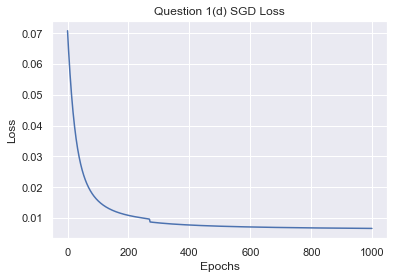

In [ ]:
sns.set()
plt.plot(loss1)
plt.title("SGD Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("180100039.png")
plt.show()

# MiniBatch 
**minibatch with lr = 0.001 and epochs = 1000**

In [ ]:
#minibatch
my_neuralnet2 = Neural_Network(neurons, activation_functions)
loss2 = my_neuralnet2.train(train_X,train_Y,minibatch=True,minibatchsize=20,lr=0.001,epochs=1000)

Epoch: 0 Loss: 0.11058931137655806
Epoch: 1 Loss: 0.11046119944126725
Epoch: 2 Loss: 0.11033310947697096
Epoch: 3 Loss: 0.11020504203739759
Epoch: 4 Loss: 0.11007699767608654
Epoch: 5 Loss: 0.1099489769463755
Epoch: 6 Loss: 0.10982098040138734
Epoch: 7 Loss: 0.10969300859401727
Epoch: 8 Loss: 0.10956506207691998
Epoch: 9 Loss: 0.10943714140249679
Epoch: 10 Loss: 0.10930924712288266
Epoch: 11 Loss: 0.10918137978993343
Epoch: 12 Loss: 0.10905353995521287
Epoch: 13 Loss: 0.10892572816997971
Epoch: 14 Loss: 0.10879794498517512
Epoch: 15 Loss: 0.10867019095140948
Epoch: 16 Loss: 0.10854246661894981
Epoch: 17 Loss: 0.10841477253770686
Epoch: 18 Loss: 0.10828710925722214
Epoch: 19 Loss: 0.10815947732665544
Epoch: 20 Loss: 0.10803187729477175
Epoch: 21 Loss: 0.10790430970992863
Epoch: 22 Loss: 0.1077767751200634
Epoch: 23 Loss: 0.10764927407268031
Epoch: 24 Loss: 0.10752180711483804
Epoch: 25 Loss: 0.10739437479313665
Epoch: 26 Loss: 0.10726697765370513
Epoch: 27 Loss: 0.10713961624218875
Epoc

In [ ]:
my_neuralnet2.predict(np.array([8,4,9]).reshape((3,1)))

Input : 
[[8]
 [4]
 [9]]
Output: 
[[0.99999899]]


In [ ]:
# plt.plot(loss1,label="without minibatch")
# plt.plot(loss2,label="minibatch")
# plt.legend()

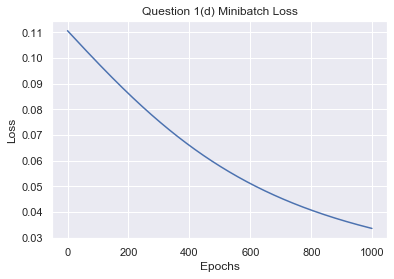

In [ ]:
sns.set()
plt.plot(loss2)
plt.title("Minibatch Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.savefig("180100039.png")
plt.show()

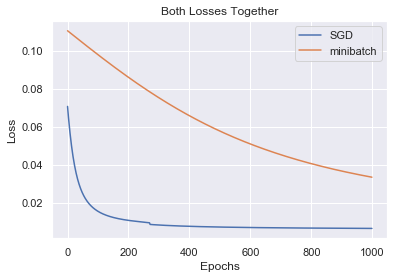

In [ ]:
plt.plot(loss1,label="SGD")
plt.plot(loss2,label="minibatch")
plt.title("Both Losses Together")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**So the major differnce we notice in the two learning algorithms are:**
<br>
**<i>Minibatch is much faster than SGD but it learns less for a give number of epochs as can be seen in the loss curves above</i>**

# Exploding and Vanishing gradients 

**Exploding**: For this we increase the no. of neurons in the hidden layers
<br>


In [ ]:
#D_in is input dimension
#H1 is dimension of first hidden layer 
#H2 is dimension of second hidden layer
#D_out is output dimension.
D_in, H1, H2,H3,H4, D_out = inputsize, 30, 50 ,100, 50, 1      

#NOTE THE CHANGE IN THE NUMBER OF NEURONS ABOVE

#You can add more layers if you wish to 
neurons = [D_in, H1, H2,H3,H4, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['linear','linear', 'relu','tanh', 'sigmoid'] #activations in each layer (Note: the input layer does not have any activation)
my_neuralnet3= Neural_Network(neurons, activation_functions)

In [ ]:
loss3 = my_neuralnet3.train(train_X,train_Y,minibatch=False)

C:\Users\DAY17\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp
C:\Users\DAY17\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
C:\Users\DAY17\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in greater


Epoch: 0 Loss: nan
Epoch: 1 Loss: nan
Epoch: 2 Loss: nan
Epoch: 3 Loss: nan
Epoch: 4 Loss: nan
Epoch: 5 Loss: nan
Epoch: 6 Loss: nan
Epoch: 7 Loss: nan
Epoch: 8 Loss: nan
Epoch: 9 Loss: nan
Epoch: 10 Loss: nan
Epoch: 11 Loss: nan
Epoch: 12 Loss: nan
Epoch: 13 Loss: nan
Epoch: 14 Loss: nan
Epoch: 15 Loss: nan
Epoch: 16 Loss: nan
Epoch: 17 Loss: nan
Epoch: 18 Loss: nan
Epoch: 19 Loss: nan
Epoch: 20 Loss: nan
Epoch: 21 Loss: nan
Epoch: 22 Loss: nan
Epoch: 23 Loss: nan
Epoch: 24 Loss: nan
Epoch: 25 Loss: nan
Epoch: 26 Loss: nan
Epoch: 27 Loss: nan
Epoch: 28 Loss: nan
Epoch: 29 Loss: nan
Epoch: 30 Loss: nan
Epoch: 31 Loss: nan
Epoch: 32 Loss: nan
Epoch: 33 Loss: nan
Epoch: 34 Loss: nan
Epoch: 35 Loss: nan
Epoch: 36 Loss: nan
Epoch: 37 Loss: nan
Epoch: 38 Loss: nan
Epoch: 39 Loss: nan
Epoch: 40 Loss: nan
Epoch: 41 Loss: nan
Epoch: 42 Loss: nan
Epoch: 43 Loss: nan
Epoch: 44 Loss: nan
Epoch: 45 Loss: nan
Epoch: 46 Loss: nan
Epoch: 47 Loss: nan
Epoch: 48 Loss: nan
Epoch: 49 Loss: nan
Epoch: 50 

**Note** : The observation will be we will get the nan values as the graients explodes
<br>
<br>
<br>

**Vanishing** : for this we make all the activations as sigmoid

In [ ]:
#D_in is input dimension
#H1 is dimension of first hidden layer 
#H2 is dimension of second hidden layer
#D_out is output dimension.
D_in, H1, H2,H3,H4,H5,H6, D_out = inputsize, 3, 5 ,10, 5,5,5,1                              #You can add more layers if you wish to 

neurons = [D_in, H1, H2,H3,H4,H5,H6, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['sigmoid','sigmoid', 'sigmoid','sigmoid', 'sigmoid','sigmoid','sigmoid'] #activations in each layer (Note: the input layer does not have any activation)
my_neuralnet4 = Neural_Network(neurons, activation_functions )

In [ ]:
loss4 = my_neuralnet4.train(train_X,train_Y,minibatch=False)

Epoch: 0 Loss: 0.19497427287834132
Epoch: 1 Loss: 0.19019423359505733
Epoch: 2 Loss: 0.18496598693085303
Epoch: 3 Loss: 0.17932771246277804
Epoch: 4 Loss: 0.17336227304875898
Epoch: 5 Loss: 0.16720368220194815
Epoch: 6 Loss: 0.16103348095878517
Epoch: 7 Loss: 0.15506286930313212
Epoch: 8 Loss: 0.14950174872529481
Epoch: 9 Loss: 0.14452318981898413
Epoch: 10 Loss: 0.14023603782785232
Epoch: 11 Loss: 0.13667522726663808
Epoch: 12 Loss: 0.13381065795538485
Epoch: 13 Loss: 0.13156762881757714
Epoch: 14 Loss: 0.12984953410149364
Epoch: 15 Loss: 0.12855622768646843
Epoch: 16 Loss: 0.12759566304890077
Epoch: 17 Loss: 0.1268894444010713
Epoch: 18 Loss: 0.12637414751908999
Epoch: 19 Loss: 0.12600026048494473
Epoch: 20 Loss: 0.1257300924636059
Epoch: 21 Loss: 0.1255354593822715
Epoch: 22 Loss: 0.1253955526494702
Epoch: 23 Loss: 0.1252951481563989
Epoch: 24 Loss: 0.12522317979562517
Epoch: 25 Loss: 0.12517164125390717
Epoch: 26 Loss: 0.12513475933534746
Epoch: 27 Loss: 0.1251083811199507
Epoch: 2

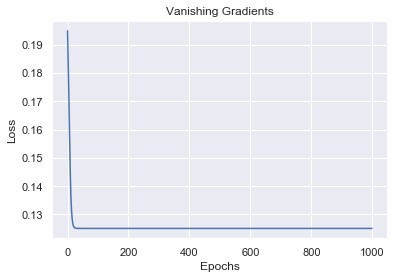

In [ ]:
sns.set()
plt.plot(loss4)
plt.title("Vanishing Gradients")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("180100039_vanishing_gradients.png")
plt.show()

**Note :** The algorithm stops learning as value of gradients are negligible hence the loss function becomes constant 